## AASF + DSC IIITM Gwalior Presents 'Intro to Deep Learning & Kaggle' Session.

### Hi !
#### Welcome! This notebook is for the contest organized with the above session.

### Instructions: 

1. Clone this Github repo to run this notebook.

2. Run this notebook. You CAN use any platform ie **Kaggle, Colab etc...** to run the notebook.

3.  The notebook is well documented with all the necessay instructions provided in between. Kindly carefully read those instructions.   


**ANY SUBMISSION VIOLATING THE INSTRUCTIONS IS SUBJECT TO DISQUALIFICATION.**

#### 4. ALL THE SUBMISSIONS WILL BE JUDGED FOR THEIR ACCURACY, CODE QUALITY etc. THE DECISION OF THE JUDGES SHALL BE FINAL & ABIDING ON ALL THE PARTICIPANTS.


In [2]:
ls

 anaconda3/
 ans.csv
 app_reviews.ipynb
'Collaborative Filtering.ipynb'
'Decision Trees.ipynb'
 DeepLearning_Contest/
 Desktop/
'Digit Recognizer.ipynb'
 Documents/
 Downloads/
'facial expresison detector.ipynb'
 Facial_Expression_Training.ipynb
 final_sub.csv
 flowers/
 hack/
 hackerearth.ipynb
'Hierarchy classifier.ipynb'
 house_pricing/
'House Pricing .ipynb'
 janata/
 janatahack.ipynb
 jupyter/
 kaggle_c.ipynb
 kaggle_linear_regression.ipynb
 KNN.ipynb
 loan_prediction/
 loan_prediction.ipynb
 Music/
 notebook.ipynb
 Pictures/
 polynomialregression.ipynb
 Public/
 PycharmProjects/
 randomforest.ipynb
 recommenders.ipynb
'recommenders using linear regression.ipynb'
 res.csv
 sub.csv
 svm.ipynb
 Templates/
 titanic/
 trafficdlsystem.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled.ipynb
 validation/
 Verzeo-Major-Project.ipynb
 Videos/


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

<a id="content1"></a>
## 1 ) Importing Various Modules.

#### The following cell is for importing the various modules required for coding. 

#### Some initial modules are loaded for you. If you require any other module, go ahead and import it !!!

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

# keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# miscellaneous packages
import cv2                  
import numpy as np  
from tqdm import tqdm
import os 
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

<a id="content2"></a>
## 2 ) Preparing the Data

#### In this section, you will write the code to read and prepare the data. The dataset used for this contest is the [Flowers Recognition Dataset](https://www.kaggle.com/alxmamaev/flowers-recognition) on Kaggle.

## 2.1) The Image Size.

#### In the cell below, the image size to be used is specified.

### For a fair judegment all the submissions need to use the same image size. Therefore, for this contest, the image size is fixed to 128.

### Any submission that uses an image size other than 128 is subject to disqualification.

In [ ]:
IMG_SIZE=128

## Usimg Image Generator for Generating DataSet


In [4]:
ls

 anaconda3/
 ans.csv
 app_reviews.ipynb
'Collaborative Filtering.ipynb'
'Decision Trees.ipynb'
 DeepLearning_Contest/
 Desktop/
'Digit Recognizer.ipynb'
 Documents/
 Downloads/
'facial expresison detector.ipynb'
 Facial_Expression_Training.ipynb
 final_sub.csv
 flowers/
 hack/
 hackerearth.ipynb
'Hierarchy classifier.ipynb'
 house_pricing/
'House Pricing .ipynb'
 janata/
 janatahack.ipynb
 jupyter/
 kaggle_c.ipynb
 kaggle_linear_regression.ipynb
 KNN.ipynb
 loan_prediction/
 loan_prediction.ipynb
 Music/
 notebook.ipynb
 Pictures/
 polynomialregression.ipynb
 Public/
 PycharmProjects/
 randomforest.ipynb
 recommenders.ipynb
'recommenders using linear regression.ipynb'
 res.csv
 sub.csv
 svm.ipynb
 Templates/
 titanic/
 trafficdlsystem.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled.ipynb
 validation/
 Verzeo-Major-Project.ipynb
 Videos/


In [5]:
pwd

'/home/zeph'

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'flowers',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'flowers_train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 3657 images belonging to 5 classes.
Found 666 images belonging to 5 classes.


## 3.1 ) Building the ConvNet Model

In [12]:
model =Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

## 3.4 ) Compiling the Keras Model & Summary

### You are free to use a different optimizer and different loss function and metrics.

In [14]:
model.compile(optimizer=RMSprop(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

### Don't change anything in this cell. The cell should work fine!!!

In [16]:
History=model.fit_generator(train_generator,steps_per_epoch=100,epochs=80,
                           validation_data=validation_generator,validation_steps=40)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
100/100 [==============================] - 70s 702ms/step - loss: 1.5266 - accuracy: 0.3063 - val_loss: 1.3142 - val_accuracy: 0.4520
Epoch 2/80
100/100 [==============================] - 65s 651ms/step - loss: 1.2811 - accuracy: 0.4130 - val_loss: 1.3938 - val_accuracy: 0.4024
Epoch 3/80
100/100 [==============================] - 67s 668ms/step - loss: 1.2116 - accuracy: 0.4618 - val_loss: 1.1176 - val_accuracy: 0.5270
Epoch 4/80
100/100 [==============================] - 79s 794ms/step - loss: 1.1580 - accuracy: 0.5065 - val_loss: 1.0813 - val_accuracy: 0.5586
Epoch 5/80
100/100 [==============================] - 82s 825ms/step - loss: 1.1236 - accuracy: 0.5455 - val_loss: 1.0828 - val_accuracy: 0.5526
Epoch 6/80
100/100 [==============================] - 82s 819ms/step - loss: 1.0921 - accuracy: 0.5414 - val_loss: 1.0224 - val_accuracy: 0.5826
Epoch 7/80
100/100 [==============================] - 

100/100 [==============================] - 88s 880ms/step - loss: 0.8682 - accuracy: 0.6632 - val_loss: 0.8881 - val_accuracy: 0.6321
Epoch 18/80
100/100 [==============================] - 88s 881ms/step - loss: 0.8432 - accuracy: 0.6664 - val_loss: 0.8123 - val_accuracy: 0.6757
Epoch 19/80
100/100 [==============================] - 86s 864ms/step - loss: 0.8538 - accuracy: 0.6726 - val_loss: 0.8068 - val_accuracy: 0.6667
Epoch 20/80
100/100 [==============================] - 81s 810ms/step - loss: 0.8220 - accuracy: 0.6893 - val_loss: 0.7885 - val_accuracy: 0.6802
Epoch 21/80
100/100 [==============================] - 81s 813ms/step - loss: 0.8152 - accuracy: 0.6824 - val_loss: 0.8720 - val_accuracy: 0.6652
Epoch 22/80
100/100 [==============================] - 85s 850ms/step - loss: 0.8256 - accuracy: 0.6821 - val_loss: 0.7524 - val_accuracy: 0.7162
Epoch 23/80
100/100 [==============================] - 85s 851ms/step - loss: 0.7963 - accuracy: 0.6922 - val_loss: 0.7799 - val_accurac

100/100 [==============================] - 81s 814ms/step - loss: 0.6999 - accuracy: 0.7268 - val_loss: 0.7270 - val_accuracy: 0.7102
Epoch 34/80
100/100 [==============================] - 85s 848ms/step - loss: 0.7137 - accuracy: 0.7258 - val_loss: 0.7773 - val_accuracy: 0.7222
Epoch 35/80
100/100 [==============================] - 87s 871ms/step - loss: 0.6915 - accuracy: 0.7353 - val_loss: 0.7995 - val_accuracy: 0.6952
Epoch 36/80
100/100 [==============================] - 90s 901ms/step - loss: 0.6788 - accuracy: 0.7394 - val_loss: 0.6899 - val_accuracy: 0.7282
Epoch 37/80
100/100 [==============================] - 85s 845ms/step - loss: 0.6712 - accuracy: 0.7410 - val_loss: 0.7166 - val_accuracy: 0.7147
Epoch 38/80
100/100 [==============================] - 85s 852ms/step - loss: 0.6739 - accuracy: 0.7485 - val_loss: 0.7027 - val_accuracy: 0.7162
Epoch 39/80
100/100 [==============================] - 82s 825ms/step - loss: 0.6824 - accuracy: 0.7362 - val_loss: 0.7049 - val_accurac

100/100 [==============================] - 117s 1s/step - loss: 0.5937 - accuracy: 0.7784 - val_loss: 0.7385 - val_accuracy: 0.7132
Epoch 51/80
100/100 [==============================] - 110s 1s/step - loss: 0.5969 - accuracy: 0.7756 - val_loss: 0.7009 - val_accuracy: 0.7297
Epoch 52/80
100/100 [==============================] - 95s 954ms/step - loss: 0.5932 - accuracy: 0.7737 - val_loss: 0.6833 - val_accuracy: 0.7492
Epoch 53/80
100/100 [==============================] - 90s 900ms/step - loss: 0.5702 - accuracy: 0.7872 - val_loss: 0.9008 - val_accuracy: 0.6712
Epoch 54/80
100/100 [==============================] - 90s 899ms/step - loss: 0.5905 - accuracy: 0.7753 - val_loss: 0.7458 - val_accuracy: 0.7237
Epoch 55/80
100/100 [==============================] - 91s 911ms/step - loss: 0.5501 - accuracy: 0.7881 - val_loss: 0.7574 - val_accuracy: 0.7267
Epoch 56/80
100/100 [==============================] - 90s 900ms/step - loss: 0.5640 - accuracy: 0.7838 - val_loss: 0.6994 - val_accuracy: 0

100/100 [==============================] - 92s 925ms/step - loss: 0.5146 - accuracy: 0.8042 - val_loss: 0.7215 - val_accuracy: 0.7432
Epoch 68/80
100/100 [==============================] - 94s 938ms/step - loss: 0.5030 - accuracy: 0.8147 - val_loss: 0.6651 - val_accuracy: 0.7477
Epoch 69/80
100/100 [==============================] - 93s 928ms/step - loss: 0.5059 - accuracy: 0.8096 - val_loss: 0.6966 - val_accuracy: 0.7553
Epoch 70/80
100/100 [==============================] - 96s 961ms/step - loss: 0.4840 - accuracy: 0.8178 - val_loss: 0.7190 - val_accuracy: 0.7658
Epoch 71/80
100/100 [==============================] - 92s 923ms/step - loss: 0.4929 - accuracy: 0.8165 - val_loss: 0.7000 - val_accuracy: 0.7462
Epoch 72/80
100/100 [==============================] - 93s 928ms/step - loss: 0.4859 - accuracy: 0.8206 - val_loss: 0.7596 - val_accuracy: 0.7357
Epoch 73/80
100/100 [==============================] - 87s 874ms/step - loss: 0.4701 - accuracy: 0.8247 - val_loss: 0.7046 - val_accurac

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

#### This section is to evaluate the model that you have build. 

### Just run the following two cells that plot the 'Model Loss vs Epochs' and the 'Model Accuracy vs Epochs'.

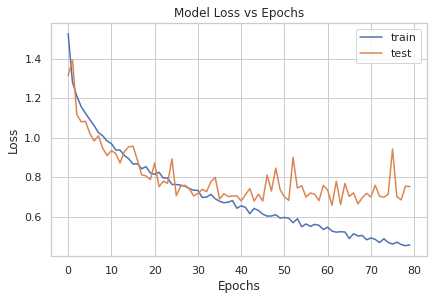

In [17]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

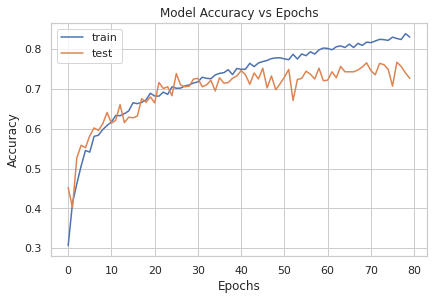

In [18]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


#  THE END.